In [ ]:
prova = Audio("/mnt/f/PhD/_Segments/44kHz/15s/pan_audio_160224_ult1_group5_0011.wav", 44100)
signal_au, sr = prova.load(normalize=False)
plt.plot(signal_au)

In [ ]:
import pandas as pd

df = pd.DataFrame(mid.transpose(), columns=mid_names)
df

In [ ]:
from pyAudioAnalysis import audioBasicIO

[sig, x] = audioBasicIO.read_audio_file("/mnt/f/PhD/_Segments/44kHz/15s/pan_audio_160224_ult1_group5_0011.wav")
x

In [4]:
mid, short, mid_names = MidTermFeatures.mid_feature_extraction(x, 44100, 5.0*44100, 5.0*44100, 0.050*44100, 0.025*44100)
df = pd.DataFrame(mid.transpose(), columns=mid_names)
df

zcr_mean energy_mean energy_entropy_mean spectral_centroid_mean  \
0  0.063968    0.004591            3.163498               0.132331   
1  0.052666    0.001623            3.189023               0.125297   
2  0.045235    0.012054            3.165104               0.109706   

  spectral_spread_mean spectral_entropy_mean spectral_flux_mean  \
0             0.162972               0.47525           0.002684   
1             0.169571              0.290566           0.003472   
2             0.155222              0.235214           0.004216   

  spectral_rolloff_mean mfcc_1_mean mfcc_2_mean  ... delta chroma_4_kurtosis  \
0                0.0954  -26.163431    1.658127  ...                4.641774   
1              0.065099  -27.726184    2.122959  ...                5.342299   
2              0.060533  -25.859031    2.368291  ...                6.946889   

  delta chroma_5_kurtosis delta chroma_6_kurtosis delta chroma_7_kurtosis  \
0                3.644048                4.554538                2.180166   
1                8.309539               10.318567                1.524412   
2                7.834902                5.541253                1.071198   

  delta chroma_8_kurtosis delta chroma_9_kurtosis delta chroma_10_kurtosis  \
0                5.819222                2.854223                 2.923262   
1                9.917951               34.599845                 7.359853   
2                15.13779                3.053349                 2.729062   

  delta chroma_11_kurtosis delta chroma_12_kurtosis delta chroma_std_kurtosis  
0                 2.981489                28.500135                  1.168233  
1                13.674627                 4.398547                  0.088872  
2                 2.993538                17.431909                    0.3235  

[3 rows x 340 columns]

In [90]:
from speechbrain.pretrained import VAD

VAD = VAD.from_hparams(
    source="speechbrain/vad-crdnn-libriparty",
    savedir="/mnt/c/Users/nicor/PycharmProjects/AudioAnalysis/tmpdir"
)

In [91]:
import librosa as lb


boundaries = VAD.get_speech_segments("/mnt/e/Nicola/16kKz/15s/IB4001.Mix-Headset_026.wav", large_chunk_size=5, small_chunk_size=2, 
overlap_small_chunk=True, apply_energy_VAD=True, double_check=True, en_activation_th=0.23, en_deactivation_th=0.20, close_th=0.25, len_th=0.5)

In [92]:
boundaries

tensor([[ 0.0000,  1.5000],
        [ 1.8900, 11.0800],
        [12.3500, 14.9700]])

In [1]:
from modules import Audio

In [47]:
audio = Audio("/mnt/f/PhD/_Segments/44kHz/15s/ta2/Idiap-2010-01-room01_audio01M_trimmed_16kHz_sync_0032.wav", 44100)
signal = audio.load()

In [52]:
denoised = audio.denoise(signal, save=True, prop_decrease=0.9)

  0%|          | 0/111 [00:00<?, ?it/s]

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline

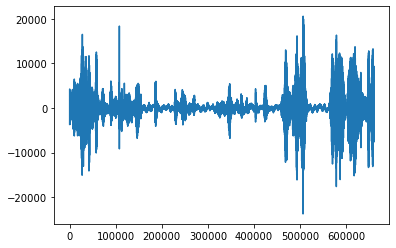

In [54]:
plt.plot(signal)

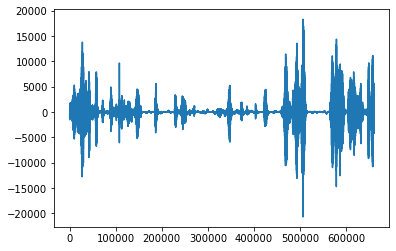

In [55]:
plt.plot(denoised)

In [ ]:
from modules import AudioFeature
import pandas as pd

In [ ]:
features = AudioFeature()

In [ ]:
turn_extractor = features.TurnTaking()
prosody_extractor = features.Prosody()

In [ ]:
turn_take = turn_extractor("/mnt/f/PhD/_Segments/Segmented15s/.selected_audio/ami/IB4001.Mix-Headset_0091.wav")
mid = prosody_extractor("/mnt/f/PhD/_Segments/Segmented15s/.selected_audio/ami/IB4001.Mix-Headset_0091.wav")

In [ ]:
turn_take

In [ ]:
features(turn_take, mid)

In [ ]:
interval = pd.interval_range(start=0, end=15, freq=5)
interval_overlap = pd.interval_range(start=4, end=15, freq=5)
time_samples = interval.union(interval_overlap)

postprocessed_df = pd.DataFrame(index=time_samples)

In [ ]:
postprocessed_df = pd.DataFrame(index=time_samples)
for start, end in zip(vad.Start, vad.End):
    for i in range(len(time_samples)):
        if start in time_samples[i]:
            postprocessed_df.loc[time_samples[i], 'Start'] = start
            postprocessed_df.loc[time_samples[i], 'End'] = time_samples[i].right
        else:
            postprocessed_df.loc[time_samples[i], 'Start'] = 0
        if end in time_samples[i]:
            postprocessed_df.loc[time_samples[i], 'Start'] = time_samples[i].left
            postprocessed_df.loc[time_samples[i], 'End'] = end
        else:
            postprocessed_df.loc[time_samples[i], 'End'] = 0

In [ ]:
postprocessed_df

In [ ]:
import librosa as lb

stream = lb.stream("/mnt/f/PhD/_Segments/Segmented15s/.selected_audio/ami/IB4001.Mix-Headset_0091.wav", block_length=1, mono=True, frame_length=220500, hop_length=176400, fill_value=0)

In [ ]:
for block in stream:
    print(block)
    


In [1]:
import opensmile

smile = opensmile.Smile(
    feature_set=opensmile.FeatureSet.ComParE_2016,
    feature_level=opensmile.FeatureLevel.Functionals,
    num_workers=4,
    multiprocessing=True
)
smile.feature_names


['audspec_lengthL1norm_sma_range',
 'audspec_lengthL1norm_sma_maxPos',
 'audspec_lengthL1norm_sma_minPos',
 'audspec_lengthL1norm_sma_quartile1',
 'audspec_lengthL1norm_sma_quartile2',
 'audspec_lengthL1norm_sma_quartile3',
 'audspec_lengthL1norm_sma_iqr1-2',
 'audspec_lengthL1norm_sma_iqr2-3',
 'audspec_lengthL1norm_sma_iqr1-3',
 'audspec_lengthL1norm_sma_percentile1.0',
 'audspec_lengthL1norm_sma_percentile99.0',
 'audspec_lengthL1norm_sma_pctlrange0-1',
 'audspec_lengthL1norm_sma_stddev',
 'audspec_lengthL1norm_sma_skewness',
 'audspec_lengthL1norm_sma_kurtosis',
 'audspec_lengthL1norm_sma_meanSegLen',
 'audspec_lengthL1norm_sma_maxSegLen',
 'audspec_lengthL1norm_sma_minSegLen',
 'audspec_lengthL1norm_sma_segLenStddev',
 'audspec_lengthL1norm_sma_upleveltime25',
 'audspec_lengthL1norm_sma_upleveltime50',
 'audspec_lengthL1norm_sma_upleveltime75',
 'audspec_lengthL1norm_sma_upleveltime90',
 'audspec_lengthL1norm_sma_risetime',
 'audspec_lengthL1norm_sma_leftctime',
 'audspec_lengthL1

In [2]:
with open("C:\\Users\\nicor\\OneDrive\\Desktop\\feat.txt", "w") as feat:
    for feats in smile.feature_names:
        feat.write(feats+"\n")


In [1]:
from modules.Features import AudioFeature

The torchaudio backend is switched to 'soundfile'. Note that 'sox_io' is not supported on Windows.
The torchaudio backend is switched to 'soundfile'. Note that 'sox_io' is not supported on Windows.


In [2]:
feat = AudioFeature()
prosody = feat.Prosody()
turn = feat.TurnTaking()

In [3]:
df_1 = prosody(path="E:\\PhD\\Data\\audio\\segmented\\ami\\ami_IB4001.Mix-Headset_0090.wav",
               sr=44100,
               frame_length=220500,
               hop_factor=176400)
df_2 = turn(path="E:\\PhD\\Data\\audio\\segmented\\ami\\ami_IB4001.Mix-Headset_0090.wav")

In [4]:
df = feat(df_2, df_1)
df

Duration_vad   Silence  Speech ratio  \
File                                                                
ami_IB4001.Mix-Headset_0090      0.472500  4.527500      0.104362   
ami_IB4001.Mix-Headset_0090      1.265625  3.734375      0.338912   
ami_IB4001.Mix-Headset_0090      1.586250  3.413750      0.464665   
ami_IB4001.Mix-Headset_0090      2.311875  2.688125      0.860033   

                             Duration_ovd  pcm_RMSenergy_sma_stddev  \
File                                                                  
ami_IB4001.Mix-Headset_0090           NaN                  0.007373   
ami_IB4001.Mix-Headset_0090           NaN                  0.036497   
ami_IB4001.Mix-Headset_0090           NaN                  0.042565   
ami_IB4001.Mix-Headset_0090           NaN                  0.029417   

                             pcm_RMSenergy_sma_skewness  \
File                                                      
ami_IB4001.Mix-Headset_0090                    4.354617   
ami_IB4001.Mix-Headset_0090                    2.456583   
ami_IB4001.Mix-Headset_0090                    1.013525   
ami_IB4001.Mix-Headset_0090                    1.599265   

                             pcm_RMSenergy_sma_kurtosis  \
File                                                      
ami_IB4001.Mix-Headset_0090                   21.719030   
ami_IB4001.Mix-Headset_0090                    8.932084   
ami_IB4001.Mix-Headset_0090                    3.300594   
ami_IB4001.Mix-Headset_0090                    4.950202   

                             pcm_RMSenergy_sma_meanSegLen  pcm_zcr_sma_stddev  \
File                                                                            
ami_IB4001.Mix-Headset_0090                      0.153333            0.034592   
ami_IB4001.Mix-Headset_0090                      0.469000            0.036998   
ami_IB4001.Mix-Headset_0090                      0.223636            0.034958   
ami_IB4001.Mix-Headset_0090                      0.143750            0.467047   

                             pcm_zcr_sma_skewness  ...  mfcc_sma[5]_amean  \
File                                               ...                      
ami_IB4001.Mix-Headset_0090              4.975715  ...           5.198359   
ami_IB4001.Mix-Headset_0090              3.367814  ...           6.607509   
ami_IB4001.Mix-Headset_0090              4.041352  ...           6.441465   
ami_IB4001.Mix-Headset_0090              0.498063  ...           4.450499   

                             mfcc_sma[6]_amean  mfcc_sma[7]_amean  \
File                                                                
ami_IB4001.Mix-Headset_0090           8.813556           5.877438   
ami_IB4001.Mix-Headset_0090           3.864108           4.750905   
ami_IB4001.Mix-Headset_0090          -3.575371          -1.805267   
ami_IB4001.Mix-Headset_0090           1.018723          -0.739599   

                             mfcc_sma[8]_amean  mfcc_sma[9]_amean  \
File                                                                
ami_IB4001.Mix-Headset_0090           7.636839           3.027328   
ami_IB4001.Mix-Headset_0090          11.003022          -0.510899   
ami_IB4001.Mix-Headset_0090          10.635875           0.941865   
ami_IB4001.Mix-Headset_0090           2.706993          -1.581273   

                             mfcc_sma[10]_amean  mfcc_sma[11]_amean  \
File                                                                  
ami_IB4001.Mix-Headset_0090            3.332255            4.165841   
ami_IB4001.Mix-Headset_0090           10.738640            4.493219   
ami_IB4001.Mix-Headset_0090           13.592336            5.158501   
ami_IB4001.Mix-Headset_0090            7.360752            5.382579   

                             mfcc_sma[12]_amean  mfcc_sma[13]_amean  \
File                                                                  
ami_IB4001.Mix-Headset_0090            8.786039            6.073684   
ami_IB4001.Mix-Headset_0090            5.256584          

In [109]:
postprocessed_df = pd.DataFrame(index=time_samples)
for start, end in zip(vad.Start, vad.End):
    for i in range(len(time_samples)):
        if start in time_samples[i]:
            postprocessed_df.loc[time_samples[i], 'Start'] = start
            postprocessed_df.loc[time_samples[i], 'End'] = time_samples[i].right
        else:
            postprocessed_df.loc[time_samples[i], 'Start'] = 0
        if end in time_samples[i]:
            postprocessed_df.loc[time_samples[i], 'Start'] = time_samples[i].left
            postprocessed_df.loc[time_samples[i], 'End'] = end
        else:
            postprocessed_df.loc[time_samples[i], 'End'] = 0

In [107]:
postprocessed_df

Start   End
(0, 5]     0.000000   NaN
(4, 9]     0.000000   NaN
(5, 10]    0.000000   NaN
(9, 14]   11.365313  14.0
(10, 15]  11.365313  15.0

In [13]:
import librosa as lb

stream = lb.stream("/mnt/f/PhD/_Segments/Segmented15s/.selected_audio/ami/IB4001.Mix-Headset_0091.wav", block_length=1, mono=True, frame_length=220500, hop_length=176400, fill_value=0)

In [14]:
for block in stream:
    print(block)
    


[ 0.00265503  0.00195312  0.00183105 ...  0.01715088  0.00341797
 -0.01165771]
[-0.00064087 -0.00061035 -0.00048828 ... -0.00430298  0.00073242
  0.00872803]
[ 7.9345703e-03  9.0637207e-03  1.0803223e-02 ...  4.5776367e-04
  6.1035156e-05 -3.0517578e-04]
[0.00646973 0.0065918  0.00665283 ... 0.         0.         0.        ]


In [27]:
import matplotlib.pyplot as plt
%matplotlib inline